# Metrics

Notebook to generate metrics from generated images

## Utils

### Imports

In [1]:
import numpy as np
from pathlib import Path
import os
from matplotlib import pyplot as plt

import cv2
# from prdc import compute_prdc
from mtcnn.mtcnn import MTCNN

## Get Data

In [3]:
DATA_DIR = Path(os.getcwd())/'data'

CELEBA_DIR = DATA_DIR/'celeba'
CELEBA_TRAIN_DIR = CELEBA_DIR/'train'
CELEBA_GAN_DIR = CELEBA_DIR/'gan'
CELEBA_VAE_DIR = CELEBA_DIR/'vae'

ANIME_DIR = DATA_DIR/'anime'
ANIME_TRAIN_DIR = ANIME_DIR/'train'
ANIME_GAN_DIR = ANIME_DIR/'gan'
ANIME_VAE_DIR = ANIME_DIR/'vae'

In [4]:
from matplotlib import pyplot

def get_images(path, n=None):
    """Generator for getting n images from path"""
    files = os.listdir(path)
    np.random.seed(42)
    np.random.shuffle(files)
    if n:
        files = files[:n]
    for img in files:
        bgr_img = cv2.imread(str(path/img))
        rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        yield rgb_img

## FID

In [4]:
def get_fid(truth_dir, gen_dir):
    """Launches command from paths"""
    !python -m pytorch_fid $truth_dir $gen_dir --device=cuda --num-workers=4

In [6]:
get_fid(CELEBA_TRAIN_DIR, CELEBA_GAN_DIR)


  1%|          | 24/3242 [00:24<07:17,  7.35it/s]

FID:  58.573989615746456



 92%|█████████▏| 2997/3242 [06:55<00:31,  7.67it/s]


In [7]:
get_fid(ANIME_TRAIN_DIR, ANIME_GAN_DIR)

100%|██████████| 3242/3242 [07:28<00:00,  7.23it/s]

100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


FID:  150.15017722028404



 98%|█████████▊| 998/1017 [02:30<00:02,  7.67it/s]

In [8]:
get_fid(CELEBA_TRAIN_DIR, CELEBA_VAE_DIR)


100%|██████████| 1017/1017 [02:33<00:00,  6.62it/s]

100%|██████████| 21/21 [00:09<00:00,  2.19it/s]

  0%|          | 6/3242 [00:20<1:07:00,  1.24s/it]

FID:  108.77845681476703



 27%|██▋       | 881/3242 [02:15<05:04,  7.76it/s]


In [9]:
get_fid(ANIME_TRAIN_DIR, ANIME_VAE_DIR)

100%|██████████| 3242/3242 [07:27<00:00,  7.25it/s]

100%|██████████| 21/21 [00:13<00:00,  1.50it/s]


FID:  214.650959970869



100%|██████████| 1017/1017 [02:19<00:00,  7.27it/s]

100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


### Results

|Dataset|Model|FID|
|-|-|-:|
|anime|vae|214.65|
|anime|gan|150.15|
|celeba|vae|108.77|
|celeba|gan|58.57|

## Specificity

In [109]:
def get_specificity(truth_dir, gen_dir):
    """Outputs specificity with euclidean distance"""
    generated_images = np.array([_ for _ in get_images(gen_dir)])
    n_img = len(generated_images)
    min_distances = [1e9] * n_img
    best_images = [None] * n_img

    for truth in tqdm(get_images(truth_dir, n_img)):
        for i, img in enumerate(generated_images):
            d = np.linalg.norm(img/255-truth/255)
            if d < min_distances[i]:
                min_distances[i] = d
                best_images[i] = truth

    return generated_images, best_images, min_distances

1024it [01:07, 15.16it/s]


mean distance is 24.547073560237344


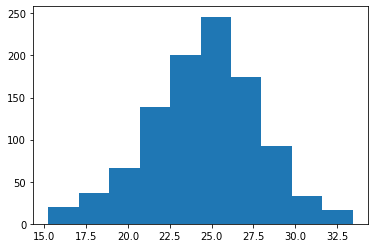

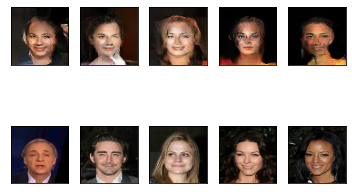

In [155]:
gen, best, dist = get_specificity(CELEBA_TRAIN_DIR, CELEBA_GAN_DIR)

print(f'mean distance is {np.mean(dist)}')

plt.hist(dist)

indices = np.argpartition(dist, 5)[0:5]
f, axarr = plt.subplots(2,5)
for i in range(5):
    axarr[0,i].imshow(gen[indices[i]])
    axarr[1,i].imshow(best[indices[i]])
    
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[1,i].get_xaxis().set_visible(False)


1024it [01:06, 15.32it/s]


mean distance is 23.248569618652425


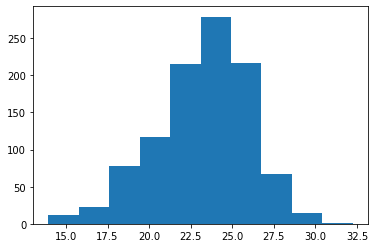

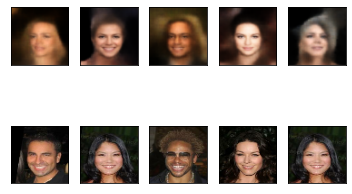

In [156]:
gen, best, dist = get_specificity(CELEBA_TRAIN_DIR, CELEBA_VAE_DIR)

print(f'mean distance is {np.mean(dist)}')

plt.hist(dist)

indices = np.argpartition(dist, 5)[0:5]
f, axarr = plt.subplots(2,5)
for i in range(5):
    axarr[0,i].imshow(gen[indices[i]])
    axarr[1,i].imshow(best[indices[i]])
    
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[1,i].get_xaxis().set_visible(False)

1024it [01:05, 15.62it/s]


mean distance is 30.083178477084402


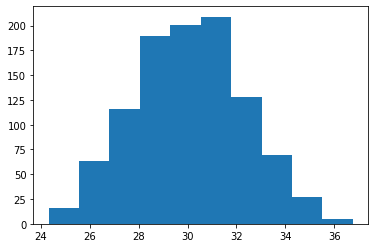

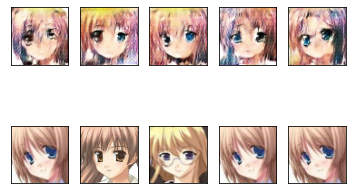

In [157]:
gen, best, dist = get_specificity(ANIME_TRAIN_DIR, ANIME_GAN_DIR)

print(f'mean distance is {np.mean(dist)}')

plt.hist(dist)

indices = np.argpartition(dist, 5)[0:5]
f, axarr = plt.subplots(2,5)
for i in range(5):
    axarr[0,i].imshow(gen[indices[i]])
    axarr[1,i].imshow(best[indices[i]])
    
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[1,i].get_xaxis().set_visible(False)

1024it [01:06, 15.32it/s]


mean distance is 22.94522159001713


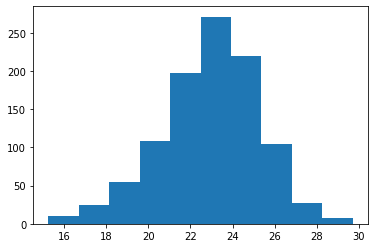

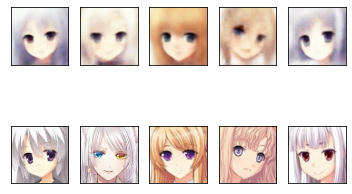

In [158]:
gen, best, dist = get_specificity(ANIME_TRAIN_DIR, ANIME_VAE_DIR)

print(f'mean distance is {np.mean(dist)}')

plt.hist(dist)

indices = np.argpartition(dist, 5)[0:5]
f, axarr = plt.subplots(2,5)
for i in range(5):
    axarr[0,i].imshow(gen[indices[i]])
    axarr[1,i].imshow(best[indices[i]])
    
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[1,i].get_xaxis().set_visible(False)

### Results

|dataset|algo|specifity 1024|
|-|-|-:|
|celeba|vae|23.24|
|celeba|gan|24.54|
|anime|vae|22.94|
|anime|gan|30.08|

## Get PRDC

In [162]:
from prdc import compute_prdc

In [177]:
fake = CELEBA_GAN_DIR
true = CELEBA_TRAIN_DIR

fake_images = np.array([_.flatten() for _ in get_images(true, 1024)]) / 255
real_images = np.array([_.flatten() for _ in get_images(fake, 1024)]) / 255

compute_prdc(
    real_features=fake_images,
    fake_features=real_images,
    nearest_k=5
)

Num real: 1024 Num fake: 1024


{'precision': 0.7880859375,
 'recall': 0.4306640625,
 'density': 0.9998046875000001,
 'coverage': 0.8505859375}

In [178]:
fake = CELEBA_VAE_DIR
true = CELEBA_TRAIN_DIR

fake_images = np.array([_.flatten() for _ in get_images(true, 1024)]) / 255
real_images = np.array([_.flatten() for _ in get_images(fake, 1024)]) / 255

compute_prdc(
    real_features=fake_images,
    fake_features=real_images,
    nearest_k=5
)

Num real: 1024 Num fake: 1024


{'precision': 0.962890625,
 'recall': 0.455078125,
 'density': 1.953125,
 'coverage': 0.9814453125}

In [179]:
fake = ANIME_VAE_DIR
true = ANIME_TRAIN_DIR

fake_images = np.array([_.flatten() for _ in get_images(true, 1024)]) / 255
real_images = np.array([_.flatten() for _ in get_images(fake, 1024)]) / 255

compute_prdc(
    real_features=fake_images,
    fake_features=real_images,
    nearest_k=5
)

Num real: 1024 Num fake: 1024


{'precision': 1.0,
 'recall': 0.033203125,
 'density': 12.263085937500001,
 'coverage': 1.0}

In [181]:
fake = ANIME_GAN_DIR
true = ANIME_TRAIN_DIR

fake_images = np.array([_.flatten() for _ in get_images(true, 1024)]) / 255
real_images = np.array([_.flatten() for _ in get_images(fake, 1024)]) / 255

compute_prdc(
    real_features=fake_images,
    fake_features=real_images,
    nearest_k=5
)

Num real: 1024 Num fake: 1024


{'precision': 0.1298828125,
 'recall': 0.037109375,
 'density': 0.0400390625,
 'coverage': 0.091796875}

on 1024 samples for fake/true
|dataset|algo|precision|recall|density|coverage|
|-|-|-:|-:|-:|-:|
|celeba|vae| 0.96|0.45|1.95|0.98|
|celeba|gan|0.78|0.43|0.99|0.85|
|anime|vae|1.00|0.03|12.26|1.0|
|anime|gan|0.12| 0.03|0.04|0.09|

## Get classification

In [12]:
fake_images = CELEBA_GAN_DIR

detector = MTCNN()
confidence = []
for generated in get_images(fake_images):
	faces = detector.detect_faces(generated)
	if faces:
		confidence += [faces[0]['confidence']]
	else:
		confidence += [0.0]

(np.array(confidence) < .99).sum()

73

In [13]:
fake_images = CELEBA_VAE_DIR

detector = MTCNN()
confidence = []
for generated in get_images(fake_images):
	faces = detector.detect_faces(generated)
	if faces:
		confidence += [faces[0]['confidence']]
	else:
		confidence += [0.0]

(np.array(confidence) < .99).sum()

9

In [14]:
fake_images = ANIME_GAN_DIR

detector = MTCNN()
confidence = []
for generated in get_images(fake_images):
	faces = detector.detect_faces(generated)
	if faces:
		confidence += [faces[0]['confidence']]
	else:
		confidence += [0.0]

(np.array(confidence) < .99).sum()

1024

In [15]:
fake_images = ANIME_VAE_DIR

detector = MTCNN()
confidence = []
for generated in get_images(fake_images):
	faces = detector.detect_faces(generated)
	if faces:
		confidence += [faces[0]['confidence']]
	else:
		confidence += [0.0]

(np.array(confidence) < .99).sum()

1021

### Results


|dataset|algo|?/1024 below .99 certainty for MTCNN|
|-|-|-:|
|celeba|gan|73|
|celeba|vae|9|
|anime|gan|1024|
|anime|vae|1021|